In [1]:
#getting and working with data
import pandas as pd
import numpy as np
import re
import os

import scipy.stats as stats

from sklearn.preprocessing import StandardScaler, Normalizer, LabelEncoder, PolynomialFeatures
from sklearn.model_selection import KFold, StratifiedKFold, GroupKFold, train_test_split, cross_val_score, cross_val_predict, GridSearchCV, RandomizedSearchCV

from sklearn.cluster import KMeans
from sklearn.metrics.cluster import silhouette_score

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC 
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error, roc_auc_score, classification_report

#visualizing results
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#import yellowbrick as yb

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import warnings; warnings.simplefilter('ignore')
np.set_printoptions(suppress=True)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\__init__.py:29: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.CSRRD7HKRKC3T3YXA7VY7TAZGLSWDKW6.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
path_validation = 'C:/Users/Schindler/Documents/Schindler_Lab/Data/Escalation/Ferguson/MF_dataset_TJO_V1_validation.csv'

In [3]:
data = pd.read_csv(path_validation)
data = pd.DataFrame(data = data)
print(data.shape)
print(data.Severity.value_counts())
data = data[data['Severity'] != 'moderate']
print(data.shape)
print(data.Severity.value_counts())
data.head()

(16, 38)
high    9
low     7
Name: Severity, dtype: int64
(16, 38)
high    9
low     7
Name: Severity, dtype: int64


,Subject,Severity,Z-score,infusions_day1,infusions_day2,infusions_day3,infusions_day4,infusions_day5,loading_day1,loading_day2,loading_day3,loading_day4,loading_day5,taking_day1,taking_day2,taking_day3,taking_day4,taking_day5,seeking_day1,seeking_day2,seeking_day3,seeking_day4,seeking_day5,first_day1,first_day2,first_day3,first_day4,first_day5,latency_day1,latency_day2,latency_day3,latency_day4,latency_day5,interval_day1,interval_day2,interval_day3,interval_day4,interval_day5
0,283,low,-1.055321,8,11,14,14,26,2,4,5,5,6,4,6,7,8,11,10,25,17,27,34,21.2,32.4,177.6,29.9,20.9,72.2,182.5,148.1,26.7,39.2,52.5,14.1,11.3,5.8,35.2
1,284,high,3.836805,3,24,24,24,30,1,10,5,7,5,3,9,12,12,11,24,30,20,89,27,148.2,27.8,5.5,5.5,46.6,234.4,119.5,104.6,15.8,17.3,300.0,9.7,7.7,8.7,20.2
2,285,low,-4.430636,7,8,10,7,8,0,0,3,4,5,2,4,4,4,3,3,13,12,26,17,2863.6,374.2,45.6,2.0,4.3,131.2,134.8,129.6,118.9,22.8,4.8,8.8,38.6,58.4,32.4
3,286,low,-7.227463,1,0,3,1,2,1,0,1,1,2,1,0,2,1,1,14,18,6,2,5,30.4,3600.0,132.2,106.1,5.1,30.4,300.0,104.9,106.1,5.1,300.0,300.0,2.2,300.0,7.4
4,289,low,-2.995673,5,0,7,3,9,5,0,4,3,7,1,0,3,1,2,18,3,4,7,5,75.7,3600.0,78.7,40.3,16.4,75.7,300.0,93.1,40.3,104.6,5.5,300.0,17.2,109.4,13.0


In [4]:
data['class'] = data['Severity'].replace(regex={r'low': 0, 'high': 1})
data.head()

,Subject,Severity,Z-score,infusions_day1,infusions_day2,infusions_day3,infusions_day4,infusions_day5,loading_day1,loading_day2,loading_day3,loading_day4,loading_day5,taking_day1,taking_day2,taking_day3,taking_day4,taking_day5,seeking_day1,seeking_day2,seeking_day3,seeking_day4,seeking_day5,first_day1,first_day2,first_day3,first_day4,first_day5,latency_day1,latency_day2,latency_day3,latency_day4,latency_day5,interval_day1,interval_day2,interval_day3,interval_day4,interval_day5,class
0,283,low,-1.055321,8,11,14,14,26,2,4,5,5,6,4,6,7,8,11,10,25,17,27,34,21.2,32.4,177.6,29.9,20.9,72.2,182.5,148.1,26.7,39.2,52.5,14.1,11.3,5.8,35.2,0
1,284,high,3.836805,3,24,24,24,30,1,10,5,7,5,3,9,12,12,11,24,30,20,89,27,148.2,27.8,5.5,5.5,46.6,234.4,119.5,104.6,15.8,17.3,300.0,9.7,7.7,8.7,20.2,1
2,285,low,-4.430636,7,8,10,7,8,0,0,3,4,5,2,4,4,4,3,3,13,12,26,17,2863.6,374.2,45.6,2.0,4.3,131.2,134.8,129.6,118.9,22.8,4.8,8.8,38.6,58.4,32.4,0
3,286,low,-7.227463,1,0,3,1,2,1,0,1,1,2,1,0,2,1,1,14,18,6,2,5,30.4,3600.0,132.2,106.1,5.1,30.4,300.0,104.9,106.1,5.1,300.0,300.0,2.2,300.0,7.4,0
4,289,low,-2.995673,5,0,7,3,9,5,0,4,3,7,1,0,3,1,2,18,3,4,7,5,75.7,3600.0,78.7,40.3,16.4,75.7,300.0,93.1,40.3,104.6,5.5,300.0,17.2,109.4,13.0,0


In [5]:
corr = data.corr()
#fig, ax = plt.subplots(figsize=(20, 20))
#sns.heatmap(corr, annot=True)
corr['class'].sort_values()

latency_day2     -0.510674
first_day3       -0.441470
interval_day4    -0.407943
interval_day3    -0.395737
latency_day3     -0.391797
first_day1       -0.373480
interval_day2    -0.314728
first_day4       -0.285367
first_day2       -0.280170
interval_day5    -0.079515
interval_day1     0.030955
latency_day5      0.059185
latency_day4      0.137365
loading_day2      0.185717
Subject           0.203929
loading_day5      0.209018
first_day5        0.210837
loading_day1      0.233847
infusions_day1    0.280885
loading_day3      0.282617
seeking_day2      0.308109
infusions_day3    0.377328
infusions_day2    0.383214
taking_day1       0.384678
loading_day4      0.387829
taking_day2       0.520024
seeking_day1      0.540603
infusions_day4    0.555256
taking_day4       0.558081
taking_day5       0.559801
taking_day3       0.573679
seeking_day5      0.577386
latency_day1      0.589768
seeking_day4      0.644055
seeking_day3      0.647275
infusions_day5    0.691056
Z-score           0.884551
c

In [6]:
data['infusions_ave'] = data[['infusions_day1', 'infusions_day2', 'infusions_day3', 'infusions_day4', 'infusions_day5']].mean(axis = 1)

data['loading_ave'] = data[['loading_day1', 'loading_day2', 'loading_day3', 'loading_day4', 'loading_day5']].mean(axis = 1)

data['taking_ave'] = data[['taking_day1', 'taking_day2', 'taking_day3', 'taking_day4', 'taking_day5']].mean(axis = 1)

data['seeking_ave'] = data[['seeking_day1', 'seeking_day2', 'seeking_day3', 'seeking_day4', 'seeking_day5']].mean(axis = 1)

data['first_ave'] = data[['first_day1', 'first_day2', 'first_day3', 'first_day4', 'first_day5']].mean(axis = 1)

data['latency_ave'] = data[['latency_day1', 'latency_day2', 'latency_day3', 'latency_day4', 'latency_day5']].mean(axis = 1)

data['interval_ave'] = data[['interval_day1', 'interval_day2', 'interval_day3', 'interval_day4', 'interval_day5']].mean(axis = 1)

features_ave = ['infusions_ave',
       'loading_ave', 'taking_ave', 'seeking_ave', 'first_ave',
       'latency_ave', 'interval_ave']

data.head()

,Subject,Severity,Z-score,infusions_day1,infusions_day2,infusions_day3,infusions_day4,infusions_day5,loading_day1,loading_day2,loading_day3,loading_day4,loading_day5,taking_day1,taking_day2,taking_day3,taking_day4,taking_day5,seeking_day1,seeking_day2,seeking_day3,seeking_day4,seeking_day5,first_day1,first_day2,first_day3,first_day4,first_day5,latency_day1,latency_day2,latency_day3,latency_day4,latency_day5,interval_day1,interval_day2,interval_day3,interval_day4,interval_day5,class,infusions_ave,loading_ave,taking_ave,seeking_ave,first_ave,latency_ave,interval_ave
0,283,low,-1.055321,8,11,14,14,26,2,4,5,5,6,4,6,7,8,11,10,25,17,27,34,21.2,32.4,177.6,29.9,20.9,72.2,182.5,148.1,26.7,39.2,52.5,14.1,11.3,5.8,35.2,0,14.6,4.4,7.2,22.6,56.40,93.74,23.78
1,284,high,3.836805,3,24,24,24,30,1,10,5,7,5,3,9,12,12,11,24,30,20,89,27,148.2,27.8,5.5,5.5,46.6,234.4,119.5,104.6,15.8,17.3,300.0,9.7,7.7,8.7,20.2,1,21.0,5.6,9.4,38.0,46.72,98.32,69.26
2,285,low,-4.430636,7,8,10,7,8,0,0,3,4,5,2,4,4,4,3,3,13,12,26,17,2863.6,374.2,45.6,2.0,4.3,131.2,134.8,129.6,118.9,22.8,4.8,8.8,38.6,58.4,32.4,0,8.0,2.4,3.4,14.2,657.94,107.46,28.60
3,286,low,-7.227463,1,0,3,1,2,1,0,1,1,2,1,0,2,1,1,14,18,6,2,5,30.4,3600.0,132.2,106.1,5.1,30.4,300.0,104.9,106.1,5.1,300.0,300.0,2.2,300.0,7.4,0,1.4,1.0,1.0,9.0,774.76,109.30,181.92
4,289,low,-2.995673,5,0,7,3,9,5,0,4,3,7,1,0,3,1,2,18,3,4,7,5,75.7,3600.0,78.7,40.3,16.4,75.7,300.0,93.1,40.3,104.6,5.5,300.0,17.2,109.4,13.0,0,4.8,3.8,1.4,7.4,762.22,122.74,89.02


In [7]:
#load saved model
import pickle
pkl_filename = 'C:/Users/Schindler/Documents/Schindler_Lab/Data/Escalation/Ferguson/5day_ave_lr.pkl'
trained_model = pickle.load(open(pkl_filename, 'rb'))
trained_model

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=39, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
#create features df and class list
val_data = data[features_ave]
val_classes = data['class']

#scale data algo
scaler = StandardScaler()
val_scaled = scaler.fit_transform(val_data)

#dummy model
dm_cv = DummyClassifier(strategy='stratified', random_state=39)
dm_cv.fit(val_scaled, val_classes)
    
#predict and look at performance
dm_pred = dm_cv.predict(val_scaled)
dm_pred_prob = dm_cv.predict_proba(val_scaled)
lr_pred = trained_model.predict(val_scaled)
lr_pred_prob = trained_model.predict_proba(val_scaled)

print(classification_report(val_classes, pred))
print(confusion_matrix(val_classes, pred))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.88      0.78      0.82         9

    accuracy                           0.81        16
   macro avg       0.81      0.82      0.81        16
weighted avg       0.82      0.81      0.81        16

[[6 1]
 [2 7]]


Text(0,0.5,'True Positive Rate (Sensitivity)')

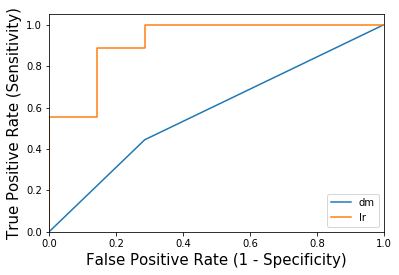

In [10]:
#viz performance
fpr_dm, tpr_dm, thresholds_dm = metrics.roc_curve(val_classes, dm_pred_prob[:,1])
fpr_lr, tpr_lr, thresholds_lr = metrics.roc_curve(val_classes, lr_pred_prob[:,1])

# plot model ROC curves
plt.plot(fpr_dm, tpr_dm, label="dm")
plt.plot(fpr_lr, tpr_lr, label="lr")

plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize = 15)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize = 15)

Confusion matrix, without normalization
[[6 1]
 [2 7]]
Normalized confusion matrix
[[0.85714286 0.14285714]
 [0.22222222 0.77777778]]


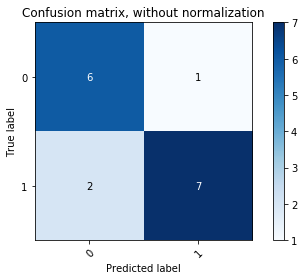

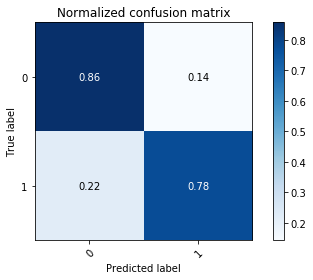

In [11]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# Plot non-normalized confusion matrix
plot_confusion_matrix(val_classes, pred, classes=val_classes,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(val_classes, pred, classes=val_classes, normalize=True,
                      title='Normalized confusion matrix')

plt.show()